# 股债历史相关性

在理论上，股票和债券的收益率应该是负相关的，但是当**通胀率高于预期**的时候，股债就可能变为高度的正相关。

是否还有其他的因素导致股债正相关还需要继续研究。

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [133]:
df = pd.read_excel(u'../data/股债历史价格.xlsx', index_col=0)

In [134]:
df.tail()

,881001.WI,CBA00102.CS
2018-08-08,3647.8478,98.8615
2018-08-09,3733.9886,98.6762
2018-08-10,3749.0849,98.6074
2018-08-13,3748.4225,98.4458
2018-08-14,3734.0611,98.4458


In [151]:
# a = (1 + df['881001.WI'].pct_change()).cumprod()
# b = (1 + df['CBA00102.CS'].pct_change()).cumprod()
a = df['881001.WI'].pct_change()
b = df['CBA00102.CS'].pct_change()
corr = a.rolling(243).corr(b)

In [152]:
corr.rank(pct=True).tail()

2018-08-08    0.030514
2018-08-09    0.008157
2018-08-10    0.001813
2018-08-13    0.003323
2018-08-14    0.004230
dtype: float64

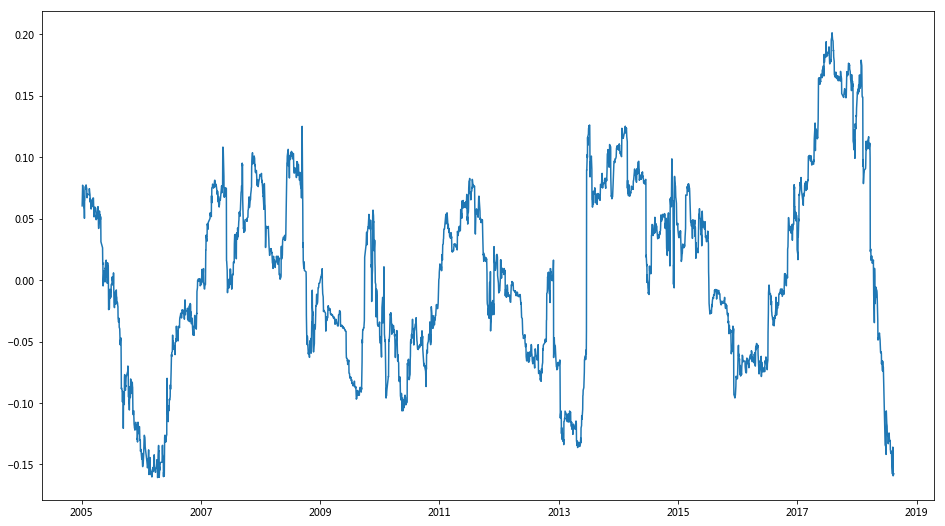

In [153]:
plt.figure(figsize=(16, 9))
plt.plot(corr)

# 计算月度收益率

In [142]:
ret_df = df.pct_change(20)

In [143]:
ret_df.tail()

,881001.WI,CBA00102.CS
2018-08-08,-0.025923,0.007931
2018-08-09,-0.026842,0.005986
2018-08-10,-0.027065,0.004589
2018-08-13,-0.024521,0.002310
2018-08-14,-0.026151,0.002317


# 月度采样

In [144]:
month_ret_df = ret_df.resample('M').last()

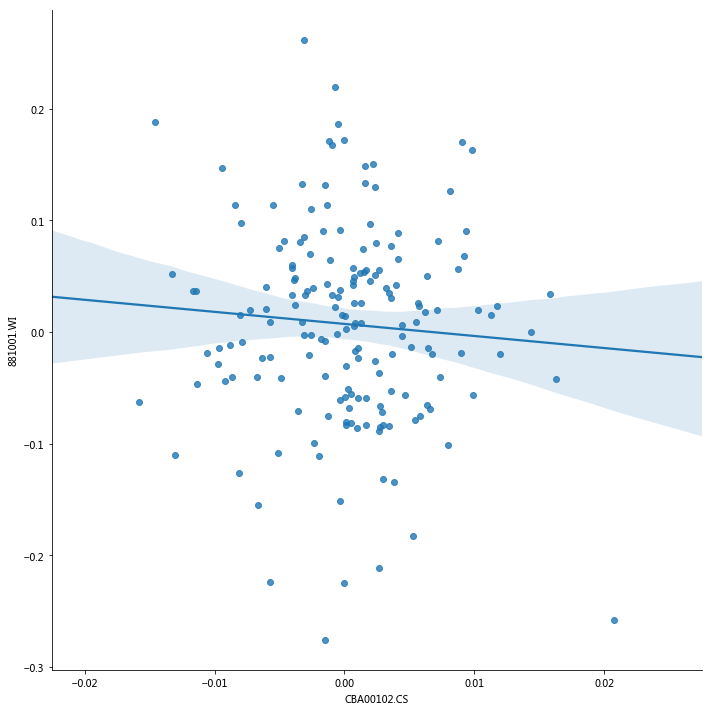

In [145]:
# plt.figure(figsize=(16, 9))
# plt.scatter(month_ret_df['CBA00102.CS'], month_ret_df['881001.WI'])
sns.lmplot(x='CBA00102.CS', y='881001.WI', data=month_ret_df, size=10)

# 分别看当债券收益率大于0和小于0时股债相关性

In [146]:
pos_df, neg_df = month_ret_df[month_ret_df['CBA00102.CS'] > 0], month_ret_df[month_ret_df['CBA00102.CS'] < 0]

### 债券收益率>0时

此时通胀没有超出市场预期，股债应该负相关

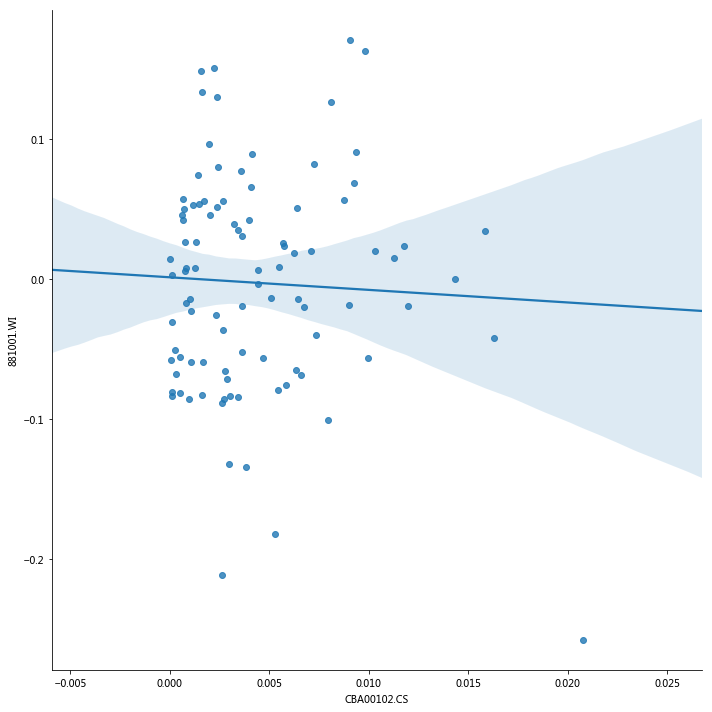

In [147]:
# plt.figure(figsize=(16, 9))
# plt.scatter(pos_df['CBA00102.CS'], pos_df['881001.WI'])
sns.lmplot(x='CBA00102.CS', y='881001.WI', data=pos_df, size=10)

### 债券收益率<0时

当通胀上升超过市场预期，同时损失股票和债券，此时股债正相关

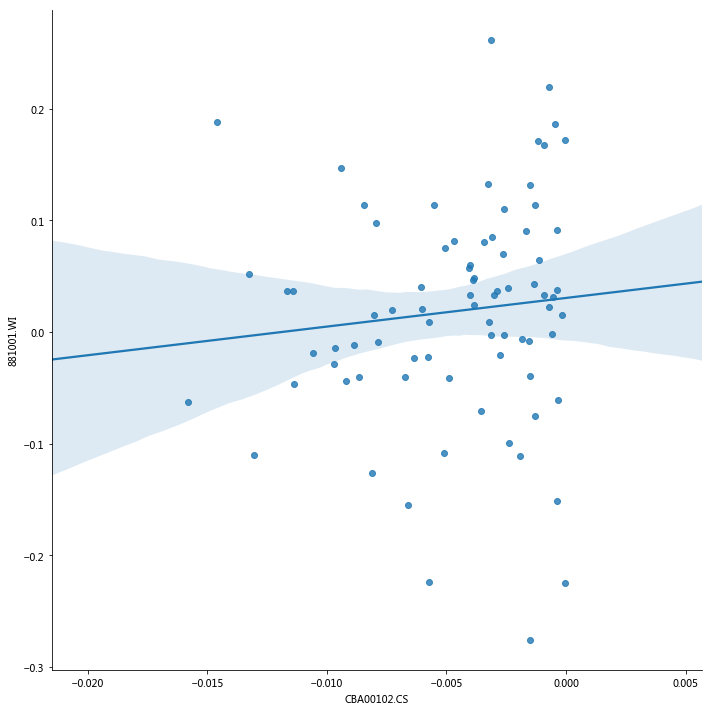

In [148]:
# plt.figure(figsize=(16, 9))
# plt.scatter(neg_df['CBA00102.CS'], neg_df['881001.WI'])
sns.lmplot(x='CBA00102.CS', y='881001.WI', data=neg_df, size=10)

# 股债相关性与10年期国债收益率的关系

股债相关性领先或至少同步于10年期国债收益率

In [149]:
bond = pd.read_excel(u'../data/中债国债到期收益率10年.xlsx', index_col=0)

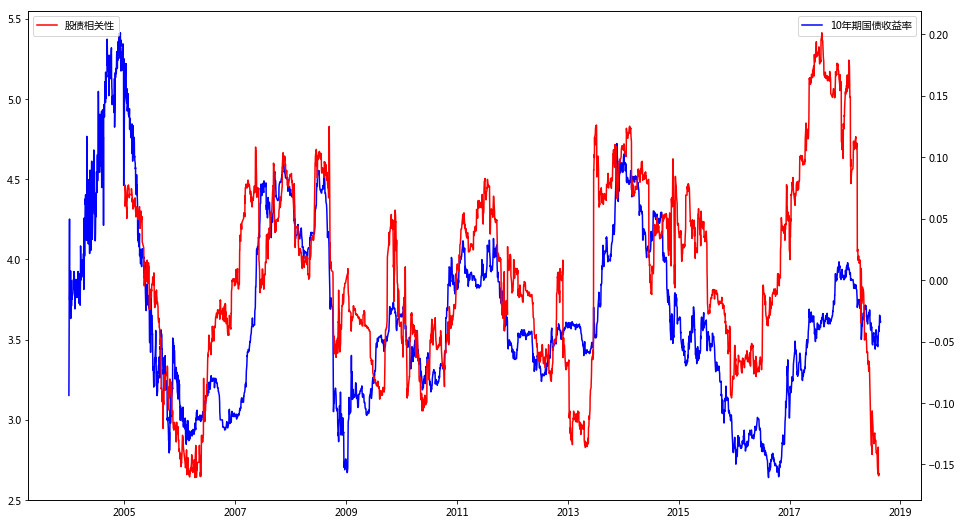

In [154]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(bond, label=u'10年期国债收益率', color='blue')
ax.legend()
ax1 = ax.twinx()
ax1.plot(corr, label=u'股债相关性', color='red')
ax1.legend(loc='upper left')